In [1]:
#Este dataset fue obtenido de:
#https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities

In [2]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.ndimage import gaussian_filter1d
from scipy.signal import medfilt
from pylab import rcParams
from matplotlib import rc
from numpy import array

In [3]:
#Líneas para trabajar con un tarjeta GPU (Nvidia) configurada (CUDA+cudnn) 

#gpu_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpu_devices[0], True)

#gpus = tf.test.gpu_device_name()
#print("GPUs: " + gpus)

In [4]:
#Importamos los datos de Kaggle API
#os.system("kaggle datasets download -d sudalairajkumar/daily-temperature-of-major-cities -p $PWD")   

In [5]:
#Descomprimimos el archivo
#os.system("archive.zip")

In [6]:
df0 = pd.read_csv('city_temperature.csv', skiprows=0, sep=',')

C:\Users\olmos\anaconda\envs\hello-tf\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df0.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [8]:
df0['Country'].unique()

array(['Algeria', 'Burundi', 'Benin', 'Central African Republic', 'Congo',
       'Egypt', 'Ethiopia', 'Gabon', 'Gambia', 'Guinea', 'Guinea-Bissau',
       'Ivory Coast', 'Kenya', 'Morocco', 'Madagascar', 'Mauritania',
       'Malawi', 'Mozambique', 'Namibia', 'Nigeria', 'Senegal',
       'Sierra Leone', 'South Africa', 'Togo', 'Tunisia', 'Tanzania',
       'Uganda', 'Zambia', 'Bangladesh', 'China', 'Hong Kong', 'India',
       'Indonesia', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
       'Malaysia', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea',
       'Pakistan', 'Philippines', 'Singapore', 'South Korea', 'Sri Lanka',
       'Taiwan', 'Tajikistan', 'Thailand', 'Turkmenistan', 'Uzbekistan',
       'Vietnam', 'Australia', 'New Zealand', 'Albania', 'Austria',
       'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Georgia', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Ma

In [9]:
df0[df0['Country']=='Argentina']['City'].unique()

array(['Buenos Aires'], dtype=object)

In [10]:
df1 = df0[df0['City']=='Buenos Aires']
df1 = df1.reset_index(drop=True)
df1.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,South/Central America & Carribean,Argentina,NaN,Buenos Aires,1,1,1995,82.4
1,South/Central America & Carribean,Argentina,NaN,Buenos Aires,1,2,1995,75.1
2,South/Central America & Carribean,Argentina,NaN,Buenos Aires,1,3,1995,73.7
3,South/Central America & Carribean,Argentina,NaN,Buenos Aires,1,4,1995,77.1
4,South/Central America & Carribean,Argentina,NaN,Buenos Aires,1,5,1995,79.5


In [11]:
df1.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
9261,South/Central America & Carribean,Argentina,NaN,Buenos Aires,5,9,2020,61.3
9262,South/Central America & Carribean,Argentina,NaN,Buenos Aires,5,10,2020,67.0
9263,South/Central America & Carribean,Argentina,NaN,Buenos Aires,5,11,2020,62.4
9264,South/Central America & Carribean,Argentina,NaN,Buenos Aires,5,12,2020,52.2
9265,South/Central America & Carribean,Argentina,NaN,Buenos Aires,5,13,2020,46.5


In [12]:
df1=df1.drop(['Region','Country','State','City'],1)
df1.head()

,Month,Day,Year,AvgTemperature
0,1,1,1995,82.4
1,1,2,1995,75.1
2,1,3,1995,73.7
3,1,4,1995,77.1
4,1,5,1995,79.5


In [13]:
df1.dtypes

Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [14]:
df1['Date']=pd.to_datetime(df1[["Year", "Month", "Day"]])
df1=df1.drop(["Year", "Month", "Day"],1)
df1.head()

,AvgTemperature,Date
0,82.4,1995-01-01
1,75.1,1995-01-02
2,73.7,1995-01-03
3,77.1,1995-01-04
4,79.5,1995-01-05


In [15]:
df1.dtypes

AvgTemperature           float64
Date              datetime64[ns]
dtype: object

In [16]:
df1['AvgTempC'] = df1.apply(lambda x: (x['AvgTemperature']-32)*(5/9) ,axis=1)
df1['AvgTempC']=df1['AvgTempC'].round(2)
df1=df1.drop(['AvgTemperature'],1)
df1.head()

,Date,AvgTempC
0,1995-01-01,28.00
1,1995-01-02,23.94
2,1995-01-03,23.17
3,1995-01-04,25.06
4,1995-01-05,26.39


Text(0, 0.5, 'Temperatura promedio (°C)')

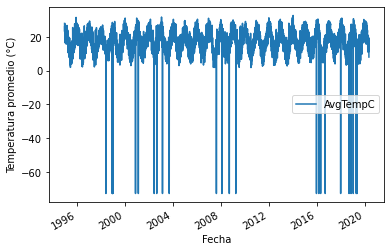

In [17]:
ax = df1.plot(x='Date', y='AvgTempC');
ax.set_xlabel("Fecha")
ax.set_ylabel("Temperatura promedio (°C)")


Text(0, 0.5, 'Temperatura promedio (°C)')

<Figure size 864x648 with 0 Axes>

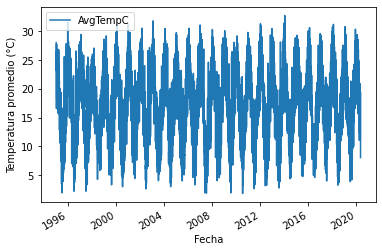

In [18]:
df1 = df1[df1['AvgTempC']>-20.00]
plt.figure(figsize=(12,9))

ax = df1.plot(x='Date', y='AvgTempC');
ax.set_xlabel("Fecha")
ax.set_ylabel("Temperatura promedio (°C)")

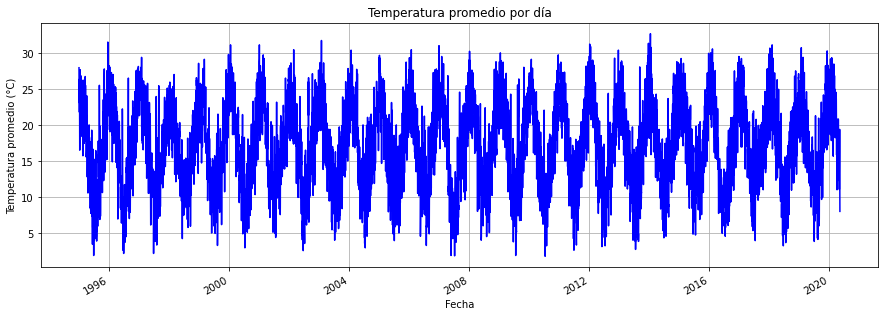

In [19]:
plt.figure(figsize=(15,5))
plt.plot_date(x=df1["Date"], y=df1['AvgTempC'], fmt="b-")
plt.gcf().autofmt_xdate()
plt.xlabel('Fecha')
plt.ylabel('Temperatura promedio (°C)')
plt.title('Temperatura promedio por día')
plt.grid(True)
plt.savefig('datos.png')
plt.show()

In [20]:
df1.count()

Date        9231
AvgTempC    9231
dtype: int64

In [21]:
#Parámetros para el modelo 
n_timestamp = 10
train_days = 7385
testing_days = 1846
n_epochs = 100
n_batch_size = 32 
n_optimizer = 'adam'
n_loss = 'mean_squared_error'

In [22]:
train_set = df1[0:train_days].reset_index(drop=True)
test_set = df1[train_days:train_days + testing_days].reset_index(drop=True)

In [23]:
training_set = train_set.iloc[:,1:2].values
testing_set = test_set.iloc[:,1:2].values

In [24]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
testing_set_scaled = sc.fit_transform(testing_set)

In [25]:
def data_split(sequence, n_timestamp):
    x = []
    y = []
    for i in range(len(sequence)):
        end_ix = i + n_timestamp
        if end_ix > len(sequence)-1:
            break
        # i to end_ix as input
        # end_ix as target output
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y)

In [26]:
x_train, y_train = data_split(training_set_scaled, n_timestamp)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test, y_test = data_split(testing_set_scaled, n_timestamp)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

x_train.shape

(7375, 10, 1)

In [27]:
 # Modelo base: Single cell LSTM
model = Sequential()
model.add(LSTM(50, activation='relu',input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))    
    
model.compile(optimizer = n_optimizer, loss = n_loss)
history = model.fit(x_train, y_train, epochs = n_epochs, batch_size = n_batch_size, validation_split = 0.1)
loss = history.history['loss']
epochs = range(len(loss))

model.save("model_base.h5")

Epoch 1/100
208/208 [==============================] - 8s 22ms/step - loss: 0.1031 - val_loss: 0.0138
Epoch 2/100
208/208 [==============================] - 3s 15ms/step - loss: 0.0184 - val_loss: 0.0129
Epoch 3/100
208/208 [==============================] - 3s 14ms/step - loss: 0.0164 - val_loss: 0.0115
Epoch 4/100
208/208 [==============================] - 3s 15ms/step - loss: 0.0145 - val_loss: 0.0103
Epoch 5/100
208/208 [==============================] - 3s 16ms/step - loss: 0.0132 - val_loss: 0.0097
Epoch 6/100
208/208 [==============================] - 4s 18ms/step - loss: 0.0130 - val_loss: 0.0086
Epoch 7/100
208/208 [==============================] - 3s 16ms/step - loss: 0.0123 - val_loss: 0.0084
Epoch 8/100
208/208 [==============================] - 3s 16ms/step - loss: 0.0113 - val_loss: 0.0089
Epoch 9/100
208/208 [==============================] - 3s 17ms/step - loss: 0.0109 - val_loss: 0.0084
Epoch 10/100
208/208 [==============================] - 3s 16ms/step - loss: 0.010

208/208 [==============================] - 3s 16ms/step - loss: 0.0080 - val_loss: 0.0074
Epoch 81/100
208/208 [==============================] - 3s 16ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 82/100
208/208 [==============================] - 3s 15ms/step - loss: 0.0077 - val_loss: 0.0074
Epoch 83/100
208/208 [==============================] - 4s 21ms/step - loss: 0.0078 - val_loss: 0.0074
Epoch 84/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0077 - val_loss: 0.00760s - loss
Epoch 85/100
208/208 [==============================] - 4s 17ms/step - loss: 0.0081 - val_loss: 0.0077
Epoch 86/100
208/208 [==============================] - 4s 17ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 87/100
208/208 [==============================] - 4s 17ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 88/100
208/208 [==============================] - 4s 17ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 89/100
208/208 [==============================] - 3s 17ms/step - loss: 

In [28]:
# Obtenemos la predicción
model = tf.keras.models.load_model("model_base.h5")
y_predicted = model.predict(x_test)

# 'Desnormalizamos' los datos
y_predicted_descaled_b = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled_b = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()

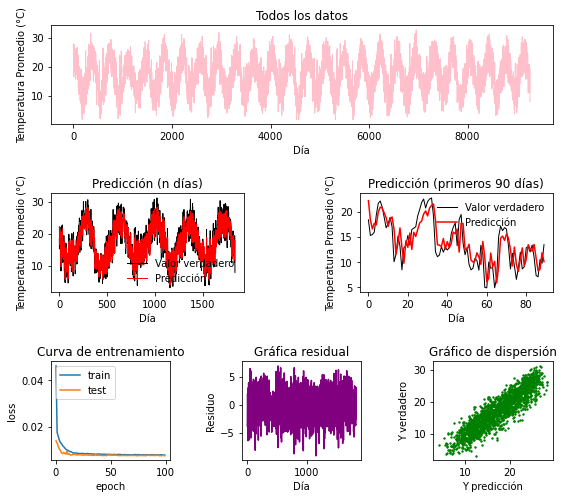

mse=6.47
r2=0.81


<Figure size 432x288 with 0 Axes>

In [29]:
# Mostramos los resultados
plt.figure(figsize=(9,8))

plt.subplot(3, 1, 1)
plt.plot(df1['AvgTempC'], color = 'pink', linewidth=1, label = 'Valor verdadero')
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Todos los datos")


plt.subplot(3, 2, 3)
plt.plot(y_test_descaled_b, color = 'black', linewidth=1, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_b, color = 'red',  linewidth=1, label = 'Predicción')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicción (n días)")

plt.subplot(3, 2, 4)
plt.plot(y_test_descaled_b[0:90], color = 'black', linewidth=1, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_b[0:90], color = 'red', label = 'Predicción')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicción (primeros 90 días)")

plt.subplot(3, 3, 7)
#plt.plot(epochs, loss, color='blue')
#plt.ylabel("Loss")
#plt.xlabel("Epoch")
#plt.title("Curva de entrenamiento")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de entrenamiento')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(3, 3, 8)
plt.plot(y_test_descaled_b-y_predicted_descaled_b, color='purple')
plt.ylabel("Residuo")
plt.xlabel("Día")
plt.title("Gráfica residual")

plt.subplot(3, 3, 9)
plt.scatter(y_predicted_descaled_b, y_test_descaled_b, s=2, color='green')
plt.ylabel("Y verdadero")
plt.xlabel("Y predicción")
plt.title("Gráfico de dispersión")

plt.subplots_adjust(hspace = 0.7, wspace=0.6)
plt.show()
plt.savefig('model_base_subplot.png')



mse = mean_squared_error(y_test_descaled_b, y_predicted_descaled_b)
r2 = r2_score(y_test_descaled_b, y_predicted_descaled_b)
print("mse=" + str(round(mse,2)))
print("r2=" + str(round(r2,2)))

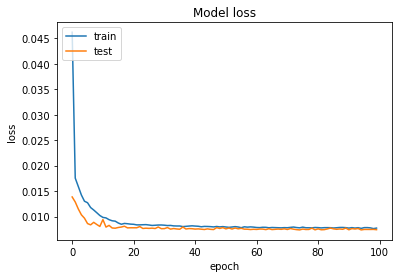

<Figure size 432x288 with 0 Axes>

In [30]:
#Gráfica de entrenamiento 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_base_loss.png')

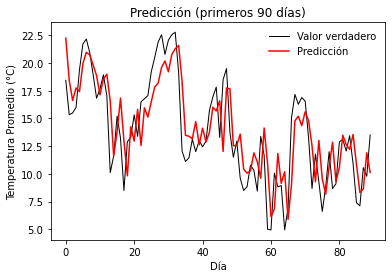

<Figure size 432x288 with 0 Axes>

In [31]:
#Gráfica de predicción
plt.plot(y_test_descaled_b[0:90], color = 'black', linewidth=1, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_b[0:90], color = 'red', label = 'Predicción')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicción (primeros 90 días)")
plt.show()
plt.savefig('model_base_pred.png')

In [32]:
model.evaluate(x_test, y_test)

58/58 [==============================] - 1s 6ms/step - loss: 0.0083


0.008317142724990845

In [33]:
 ##Corremos las variaciones##  
#Variación 1.1: Stacked LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer = n_optimizer, loss = n_loss)
history = model.fit(x_train, y_train, epochs = n_epochs, batch_size = n_batch_size, validation_split = 0.1)
loss = history.history['loss']
epochs = range(len(loss))

model.save("model_var11.h5")

Epoch 1/100
208/208 [==============================] - 15s 35ms/step - loss: 0.0761 - val_loss: 0.0165
Epoch 2/100
208/208 [==============================] - 6s 28ms/step - loss: 0.0185 - val_loss: 0.0154
Epoch 3/100
208/208 [==============================] - 6s 28ms/step - loss: 0.0168 - val_loss: 0.0138
Epoch 4/100
208/208 [==============================] - 7s 33ms/step - loss: 0.0156 - val_loss: 0.0126
Epoch 5/100
208/208 [==============================] - 7s 32ms/step - loss: 0.0147 - val_loss: 0.0114
Epoch 6/100
208/208 [==============================] - 7s 33ms/step - loss: 0.0134 - val_loss: 0.0104
Epoch 7/100
208/208 [==============================] - 8s 37ms/step - loss: 0.0131 - val_loss: 0.0100
Epoch 8/100
208/208 [==============================] - 7s 34ms/step - loss: 0.0117 - val_loss: 0.0090
Epoch 9/100
208/208 [==============================] - 7s 32ms/step - loss: 0.0119 - val_loss: 0.0093
Epoch 10/100
208/208 [==============================] - 6s 29ms/step - loss: 0.01

208/208 [==============================] - 8s 37ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 80/100
208/208 [==============================] - 8s 38ms/step - loss: 0.0076 - val_loss: 0.0076 - loss: 0.00 - ETA: 0s - loss: 0.0
Epoch 81/100
208/208 [==============================] - 5s 26ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 82/100
208/208 [==============================] - 5s 24ms/step - loss: 0.0078 - val_loss: 0.0081
Epoch 83/100
208/208 [==============================] - 6s 28ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 84/100
208/208 [==============================] - 6s 30ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 85/100
208/208 [==============================] - 5s 25ms/step - loss: 0.0080 - val_loss: 0.0078
Epoch 86/100
208/208 [==============================] - 6s 31ms/step - loss: 0.0080 - val_loss: 0.0075
Epoch 87/100
208/208 [==============================] - 6s 30ms/step - loss: 0.0077 - val_loss: 0.0078 - loss - ETA: 0s
Epoch 88/100
208/208 [============

In [34]:
# Obtenemos la predicción
model = tf.keras.models.load_model("model_var11.h5")
y_predicted = model.predict(x_test)

# 'Desnormalizamos' los datos
y_predicted_descaled_v11 = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled_v11 = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()

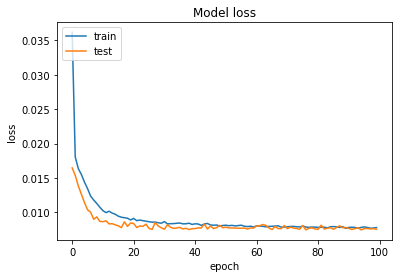

<Figure size 432x288 with 0 Axes>

In [35]:
#Gráfica de entrenamiento 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_var11_loss.png')

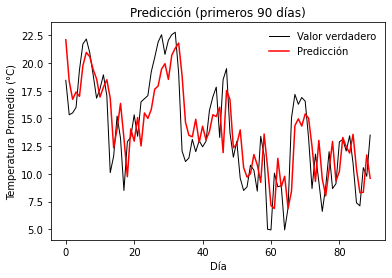

<Figure size 432x288 with 0 Axes>

In [36]:
#Gráfica de predicción
plt.plot(y_test_descaled_v11[0:90], color = 'black', linewidth=1, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_v11[0:90], color = 'red', label = 'Predicción')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicción (primeros 90 días)")
plt.show()
plt.savefig('model_var11_pred.png')

In [37]:
#Variación 1.2: Bidirectional LSTM
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer = n_optimizer, loss = n_loss)
history = model.fit(x_train, y_train, epochs = n_epochs, batch_size = n_batch_size, validation_split = 0.1)
loss = history.history['loss']
epochs = range(len(loss))

model.save("model_var12.h5")

Epoch 1/100
208/208 [==============================] - 13s 30ms/step - loss: 0.0659 - val_loss: 0.0139
Epoch 2/100
208/208 [==============================] - 5s 24ms/step - loss: 0.0144 - val_loss: 0.0123
Epoch 3/100
208/208 [==============================] - 5s 23ms/step - loss: 0.0131 - val_loss: 0.0110
Epoch 4/100
208/208 [==============================] - 5s 24ms/step - loss: 0.0118 - val_loss: 0.0089
Epoch 5/100
208/208 [==============================] - 5s 22ms/step - loss: 0.0107 - val_loss: 0.0091
Epoch 6/100
208/208 [==============================] - 5s 24ms/step - loss: 0.0100 - val_loss: 0.0082
Epoch 7/100
208/208 [==============================] - 5s 22ms/step - loss: 0.0099 - val_loss: 0.0079
Epoch 8/100
208/208 [==============================] - 4s 20ms/step - loss: 0.0094 - val_loss: 0.0082
Epoch 9/100
208/208 [==============================] - 4s 20ms/step - loss: 0.0087 - val_loss: 0.0078
Epoch 10/100
208/208 [==============================] - 4s 21ms/step - loss: 0.00

208/208 [==============================] - 4s 19ms/step - loss: 0.0071 - val_loss: 0.0074
Epoch 81/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 82/100
208/208 [==============================] - 4s 21ms/step - loss: 0.0075 - val_loss: 0.0077
Epoch 83/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 84/100
208/208 [==============================] - 4s 21ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 85/100
208/208 [==============================] - 4s 20ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 86/100
208/208 [==============================] - 4s 22ms/step - loss: 0.0073 - val_loss: 0.0075A: 0s - loss: 0
Epoch 87/100
208/208 [==============================] - 4s 21ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 88/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 89/100
208/208 [==============================] - 4s 19ms/step - 

In [38]:
# Obtenemos la predicción
model = tf.keras.models.load_model("model_var12.h5")
y_predicted = model.predict(x_test)

# 'Desnormalizamos' los datos
y_predicted_descaled_v12 = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled_v12 = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()

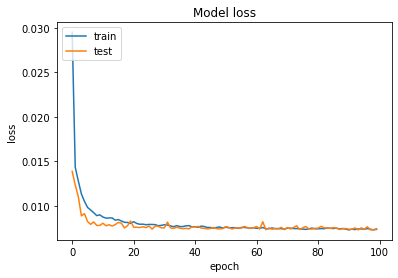

<Figure size 432x288 with 0 Axes>

In [39]:
#Gráfica de entrenamiento 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_var12_loss.png')

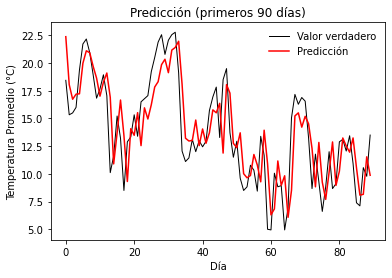

<Figure size 432x288 with 0 Axes>

In [40]:
#Gráfica de predicción
plt.plot(y_test_descaled_v12[0:90], color = 'black', linewidth=1, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_v12[0:90], color = 'red', label = 'Predicción')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicción (primeros 90 días)")
plt.show()
plt.savefig('model_var12_pred.png')

In [41]:
#Variación 2: Optimizer = SGD

n_optimizer = 'sgd'

model = Sequential()
model.add(LSTM(50, activation='relu',input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))  
    
model.compile(optimizer = n_optimizer, loss = n_loss)
history = model.fit(x_train, y_train, epochs = n_epochs, batch_size = n_batch_size, validation_split = 0.1)
loss = history.history['loss']
epochs = range(len(loss))

model.save("model_var2.h5")

Epoch 1/100
208/208 [==============================] - 9s 22ms/step - loss: 0.0760 - val_loss: 0.0241
Epoch 2/100
208/208 [==============================] - 3s 17ms/step - loss: 0.0249 - val_loss: 0.0210
Epoch 3/100
208/208 [==============================] - 4s 17ms/step - loss: 0.0215 - val_loss: 0.0190
Epoch 4/100
208/208 [==============================] - 4s 18ms/step - loss: 0.0195 - val_loss: 0.0175
Epoch 5/100
208/208 [==============================] - 3s 16ms/step - loss: 0.0181 - val_loss: 0.0164
Epoch 6/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0176 - val_loss: 0.0152
Epoch 7/100
208/208 [==============================] - 3s 16ms/step - loss: 0.0159 - val_loss: 0.0143
Epoch 8/100
208/208 [==============================] - 4s 17ms/step - loss: 0.0156 - val_loss: 0.0138
Epoch 9/100
208/208 [==============================] - 3s 17ms/step - loss: 0.0143 - val_loss: 0.0133
Epoch 10/100
208/208 [==============================] - 3s 17ms/step - loss: 0.014

208/208 [==============================] - 4s 21ms/step - loss: 0.0117 - val_loss: 0.0116
Epoch 81/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0117 - val_loss: 0.0117
Epoch 82/100
208/208 [==============================] - 4s 20ms/step - loss: 0.0114 - val_loss: 0.0116
Epoch 83/100
208/208 [==============================] - 8s 40ms/step - loss: 0.0113 - val_loss: 0.0116T
Epoch 84/100
208/208 [==============================] - 6s 30ms/step - loss: 0.0115 - val_loss: 0.0117
Epoch 85/100
208/208 [==============================] - 4s 17ms/step - loss: 0.0111 - val_loss: 0.0116
Epoch 86/100
208/208 [==============================] - 3s 14ms/step - loss: 0.0115 - val_loss: 0.0116
Epoch 87/100
208/208 [==============================] - 6s 29ms/step - loss: 0.0113 - val_loss: 0.0116TA: 0s - loss
Epoch 88/100
208/208 [==============================] - 11s 53ms/step - loss: 0.0114 - val_loss: 0.0116
Epoch 89/100
208/208 [==============================] - 8s 39ms/step - 

In [42]:
# Obtenemos la predicción
model = tf.keras.models.load_model("model_var2.h5")
y_predicted = model.predict(x_test)

# 'Desnormalizamos' los datos
y_predicted_descaled_v2 = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled_v2 = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()

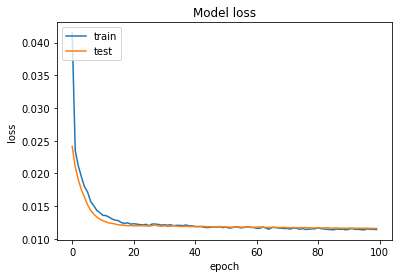

<Figure size 432x288 with 0 Axes>

In [43]:
#Gráfica de entrenamiento 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_var2_loss.png')

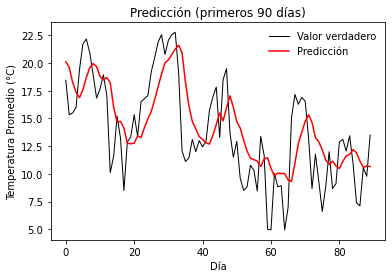

<Figure size 432x288 with 0 Axes>

In [44]:
#Gráfica de predicción
plt.plot(y_test_descaled_v2[0:90], color = 'black', linewidth=1, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_v2[0:90], color = 'red', label = 'Predicción')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicción (primeros 90 días)")
plt.show()
plt.savefig('model_var2_pred.png')

In [45]:
#Variación 3: Batch_size = 64

n_batch_size = 64

model = Sequential()
model.add(LSTM(50, activation='relu',input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))  
    
model.compile(optimizer = n_optimizer, loss = n_loss)
history = model.fit(x_train, y_train, epochs = n_epochs, batch_size = n_batch_size, validation_split = 0.1)
loss = history.history['loss']
epochs = range(len(loss))

model.save("model_var3.h5")

Epoch 1/100
104/104 [==============================] - 11s 56ms/step - loss: 0.0938 - val_loss: 0.0240
Epoch 2/100
104/104 [==============================] - 2s 22ms/step - loss: 0.0256 - val_loss: 0.0221
Epoch 3/100
104/104 [==============================] - 2s 23ms/step - loss: 0.0238 - val_loss: 0.0210
Epoch 4/100
104/104 [==============================] - 3s 24ms/step - loss: 0.0223 - val_loss: 0.0200
Epoch 5/100
104/104 [==============================] - 2s 20ms/step - loss: 0.0212 - val_loss: 0.0190
Epoch 6/100
104/104 [==============================] - 2s 22ms/step - loss: 0.0201 - val_loss: 0.0183
Epoch 7/100
104/104 [==============================] - 2s 23ms/step - loss: 0.0194 - val_loss: 0.0176
Epoch 8/100
104/104 [==============================] - 2s 23ms/step - loss: 0.0191 - val_loss: 0.0170
Epoch 9/100
104/104 [==============================] - 2s 23ms/step - loss: 0.0181 - val_loss: 0.0164
Epoch 10/100
104/104 [==============================] - 4s 39ms/step - loss: 0.01

104/104 [==============================] - 3s 26ms/step - loss: 0.0124 - val_loss: 0.0122
Epoch 81/100
104/104 [==============================] - 3s 31ms/step - loss: 0.0121 - val_loss: 0.0122
Epoch 82/100
104/104 [==============================] - 3s 26ms/step - loss: 0.0119 - val_loss: 0.0122
Epoch 83/100
104/104 [==============================] - 2s 19ms/step - loss: 0.0122 - val_loss: 0.0122
Epoch 84/100
104/104 [==============================] - 2s 19ms/step - loss: 0.0121 - val_loss: 0.0122 ETA: 0s - los
Epoch 85/100
104/104 [==============================] - 3s 26ms/step - loss: 0.0121 - val_loss: 0.0122
Epoch 86/100
104/104 [==============================] - 3s 29ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 87/100
104/104 [==============================] - 2s 23ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 88/100
104/104 [==============================] - 2s 22ms/step - loss: 0.0120 - val_loss: 0.0121
Epoch 89/100
104/104 [==============================] - 3s 26ms/step - l

In [46]:
# Obtenemos la predicción
model = tf.keras.models.load_model("model_var3.h5")
y_predicted = model.predict(x_test)

# 'Desnormalizamos' los datos
y_predicted_descaled_v3 = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled_v3 = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()

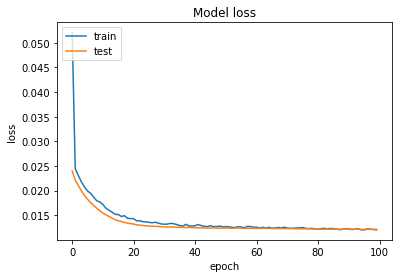

<Figure size 432x288 with 0 Axes>

In [47]:
#Gráfica de entrenamiento 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_var2_loss.png')

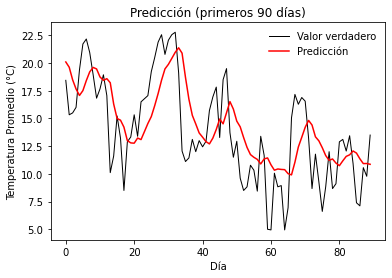

<Figure size 432x288 with 0 Axes>

In [48]:
#Gráfica de predicción
#plt.figure(figsize=(9,8))
plt.plot(y_test_descaled_v3[0:90], color = 'black', linewidth=1, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_v3[0:90], color = 'red', label = 'Predicción')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicción (primeros 90 días)")
plt.show()
plt.savefig('model_var2_pred.png')

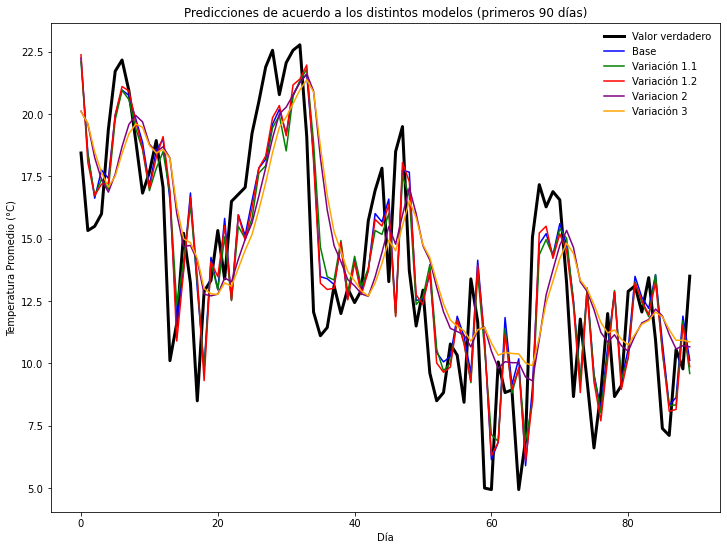

<Figure size 432x288 with 0 Axes>

In [49]:
#Gráfica de predicción para todos los modelos
plt.figure(figsize=(12,9))
plt.plot(y_test_descaled_v3[0:90], color = 'black', linewidth=3, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_b[0:90], color = 'blue', label = 'Base')
plt.plot(y_predicted_descaled_v11[0:90], color = 'green', label = 'Variación 1.1')
plt.plot(y_predicted_descaled_v12[0:90], color = 'red', label = 'Variación 1.2')
plt.plot(y_predicted_descaled_v2[0:90], color = 'purple', label = 'Variacion 2')
plt.plot(y_predicted_descaled_v3[0:90], color = 'orange', label = 'Variación 3')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicciones de acuerdo a los distintos modelos (primeros 90 días)")
plt.show()
plt.savefig('model_var2_pred.png')